**TELCO CUSTOMER CHURN EDA & PREDICTIVE ML**

- AIM: Create a model to predict whether or not a customer will Churn.

- This project explores the churn of an internet and the telephone provider including;

  1. Exploratoray Data Analysis
  2. Churn Cohort Analysis
  3. Predictive Machine Learning

**About Dataset**
- Context: Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

- Content: Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

- The data set includes information about:
Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependentsd dependents

**Let's Login**

In [1]:
# Import all necessary libraries/dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read and explore the data

df = pd.read_csv('Telco-Customers-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
# Checking for null values in the dataset

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- EXPLORATORY DATA ANALYSIS

In [8]:
# Display the balance of the class labels using a countplot

df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

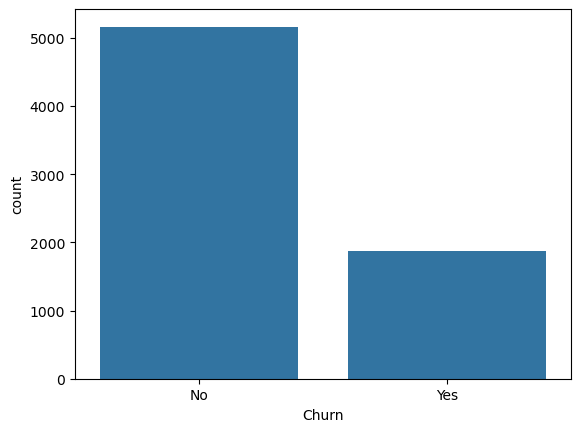

In [9]:
sns.countplot(data = df, x = 'Churn')

<Axes: xlabel='Churn', ylabel='TotalCharges'>

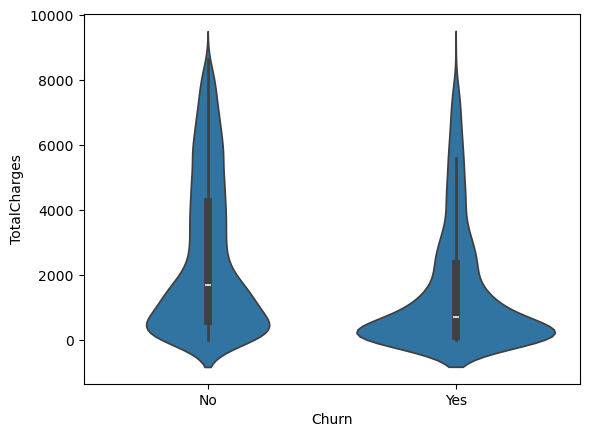

In [10]:
# Explore the distribution of TotalCharges between Churn categories using a Box Plot or Violin Plot

sns.violinplot(data = df, x = 'Churn', y = 'TotalCharges')

<Axes: xlabel='Churn', ylabel='TotalCharges'>

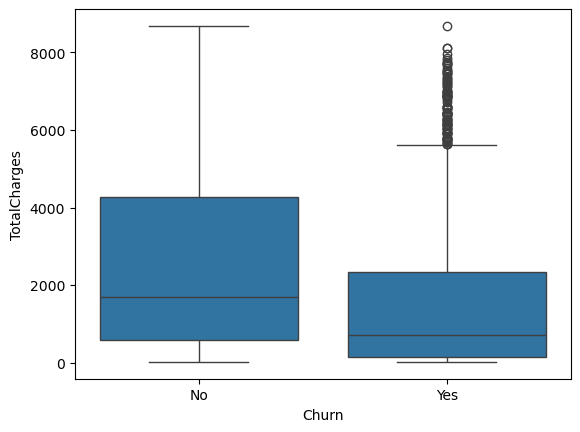

In [11]:
sns.boxplot(data = df, x = 'Churn', y = 'TotalCharges')

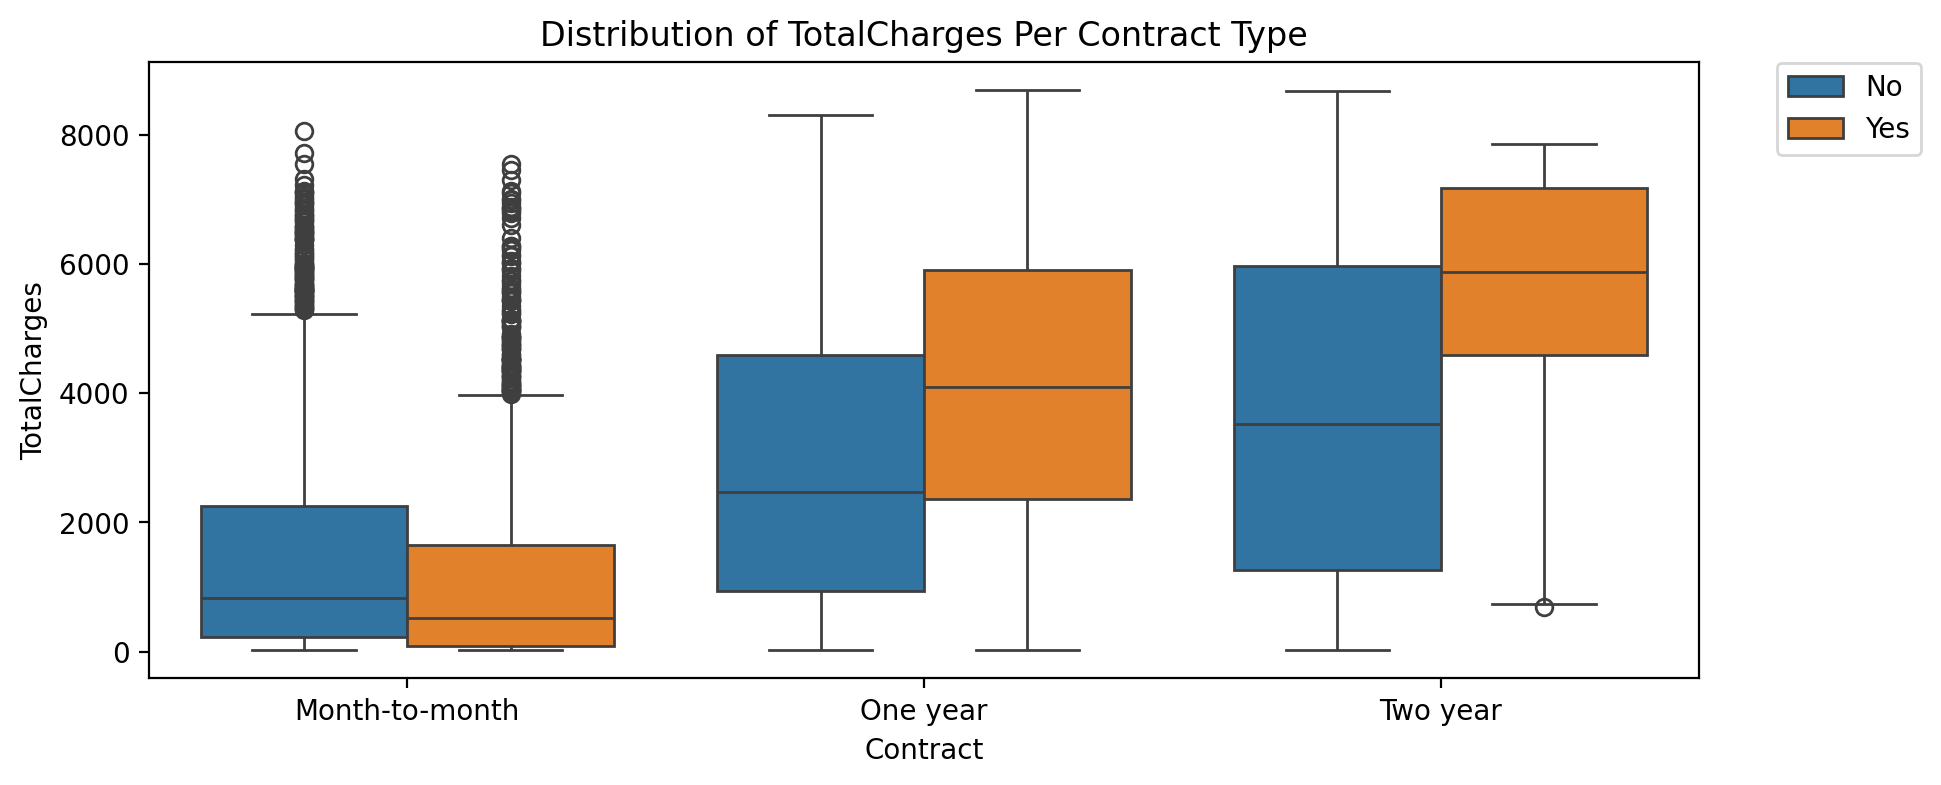

In [18]:
# Create a boxplot showing the distribution of TotalCharges per Contract type based on the Churn class

plt.figure(figsize = (10, 4), dpi = 200)
plt.title('Distribution of TotalCharges Per Contract Type')
sns.boxplot(data = df, x = 'Contract', y = 'TotalCharges', hue = 'Churn')
plt.legend(loc =(1.05, 0.85))

In [24]:
# Create a barplt showing the correlation of the features to the class label

corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]).corr()

In [25]:
corr_df

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
SeniorCitizen,1.000000,0.001819,-0.001819,-0.016957,0.016957,0.210550,-0.210550,-0.008392,0.008392,-0.136377,...,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987,-0.150541,0.150541
gender_Female,0.001819,1.000000,-1.000000,-0.001379,0.001379,0.010349,-0.010349,-0.007515,0.007515,-0.004335,...,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199,-0.008545,0.008545
gender_Male,-0.001819,-1.000000,1.000000,0.001379,-0.001379,-0.010349,0.010349,0.007515,-0.007515,0.004335,...,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199,0.008545,-0.008545
Partner_No,-0.016957,-0.001379,0.001379,1.000000,-1.000000,0.452269,-0.452269,0.018397,-0.018397,0.130028,...,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948,-0.149982,0.149982
Partner_Yes,0.016957,0.001379,-0.001379,-1.000000,1.000000,-0.452269,0.452269,-0.018397,0.018397,-0.130028,...,0.083067,0.247334,0.013957,-0.013957,0.111406,0.082327,-0.083207,-0.096948,0.149982,-0.149982
Dependents_No,0.210550,0.010349,-0.010349,0.452269,-0.452269,1.000000,-1.000000,-0.001078,0.001078,-0.023388,...,-0.069222,-0.201699,-0.110131,0.110131,-0.052369,-0.061134,0.149274,-0.056448,-0.163128,0.163128
Dependents_Yes,-0.210550,-0.010349,0.010349,-0.452269,0.452269,-1.000000,1.000000,0.001078,-0.001078,0.023388,...,0.069222,0.201699,0.110131,-0.110131,0.052369,0.061134,-0.149274,0.056448,0.163128,-0.163128
PhoneService_No,-0.008392,-0.007515,0.007515,0.018397,-0.018397,-0.001078,0.001078,1.000000,-1.000000,-0.315218,...,0.003142,-0.004442,0.016696,-0.016696,-0.008271,0.006916,-0.002747,0.004463,0.011691,-0.011691
PhoneService_Yes,0.008392,0.007515,-0.007515,-0.018397,0.018397,0.001078,-0.001078,-1.000000,1.000000,0.315218,...,-0.003142,0.004442,-0.016696,0.016696,0.008271,-0.006916,0.002747,-0.004463,-0.011691,0.011691
MultipleLines_No,-0.136377,-0.004335,0.004335,0.130028,-0.130028,-0.023388,0.023388,-0.315218,0.315218,1.000000,...,0.001694,-0.102756,0.151974,-0.151974,-0.069663,-0.063712,-0.080990,0.222395,0.032654,-0.032654


In [30]:
corr_Yes_churn = corr_df['Churn_Yes'].sort_values().iloc[1:-1]

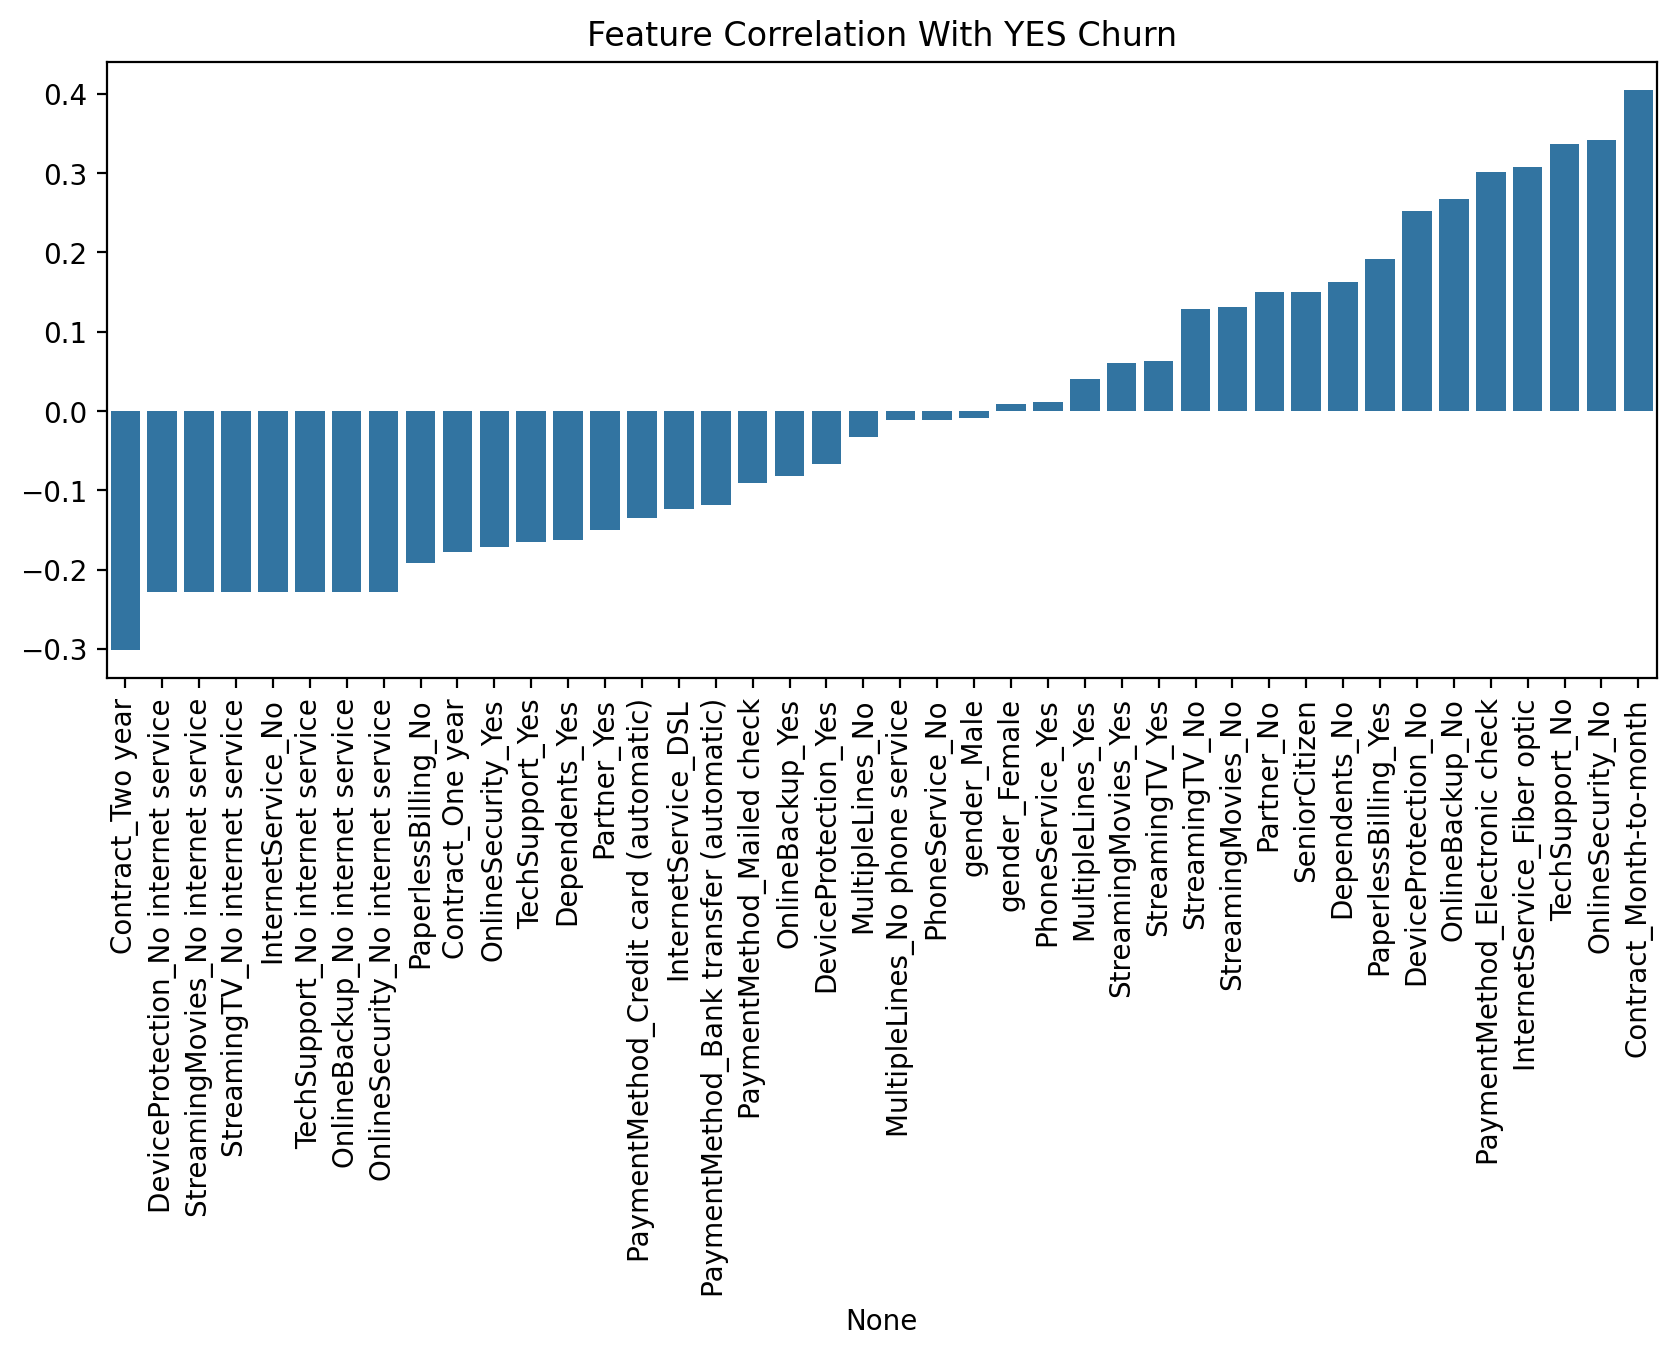

In [32]:
# Visualizing the corrlation

plt.figure(figsize = (10, 4), dpi = 200)
plt.title('Feature Correlation With YES Churn')
sns.barplot(x = corr_Yes_churn.index, y = corr_Yes_churn.values)
plt.xticks(rotation = 90);

**CHURN ANALYSIS**

- This section focuses on segmenting customers based on their tenure by creating 'Cohorts' which will allow the examination of the difference between customer cohort segments

In [33]:
# The three(3) contract types available;

df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [34]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

<Axes: title={'center': 'The Distribution of Tenure'}, xlabel='tenure', ylabel='Count'>

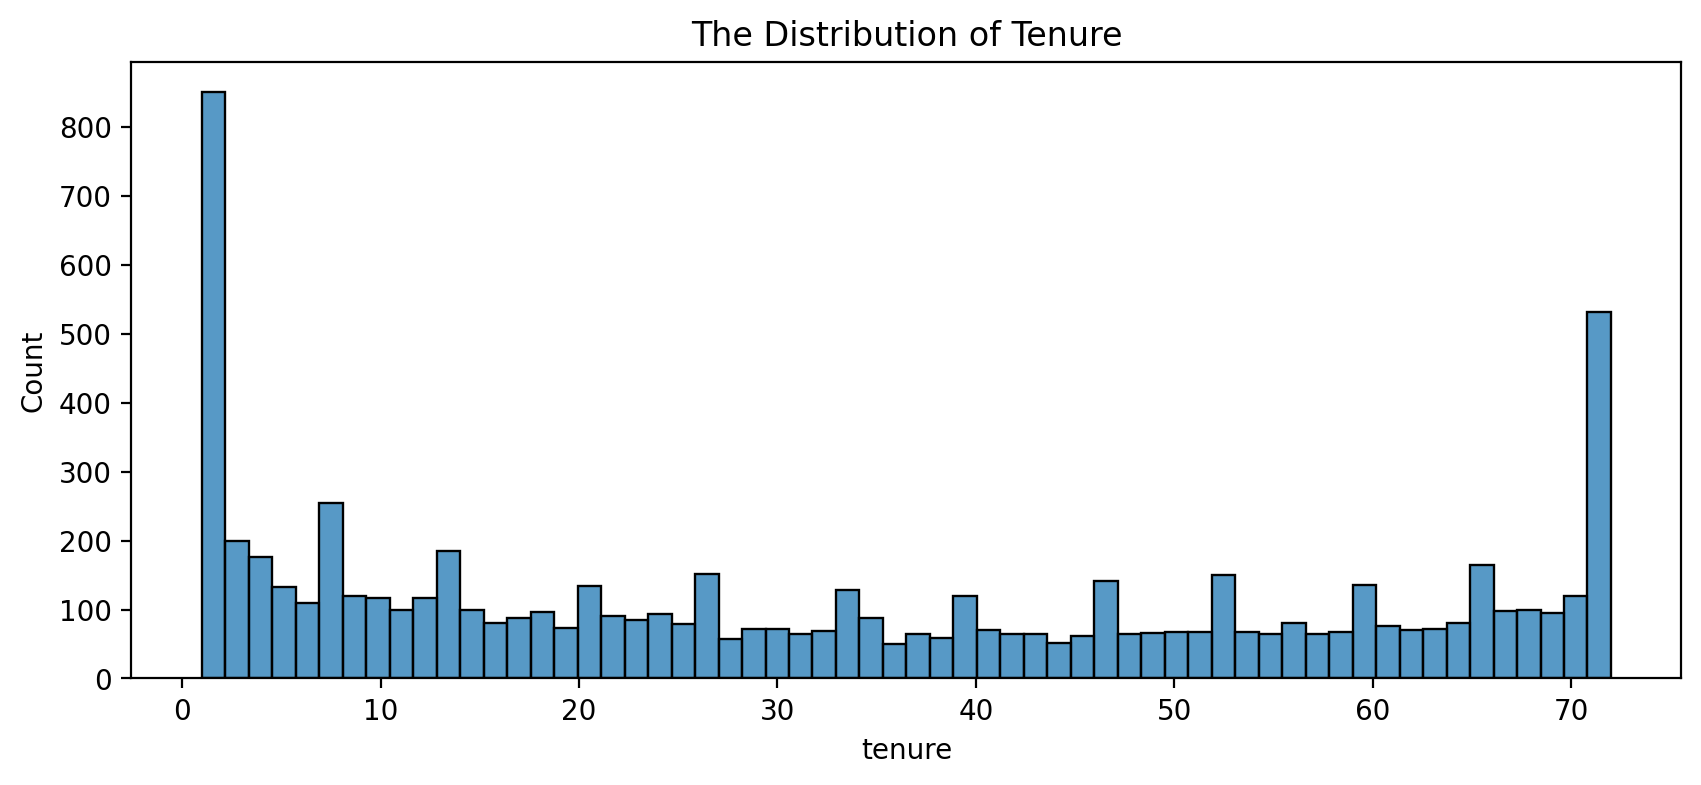

In [38]:
# The distribution of 'tenure' column, which is the amount of months a customer was or has been on customer;

plt.figure(figsize=(10, 4), dpi= 200)
plt.title('The Distribution of Tenure')
sns.histplot(data=df, x='tenure', bins = 60)

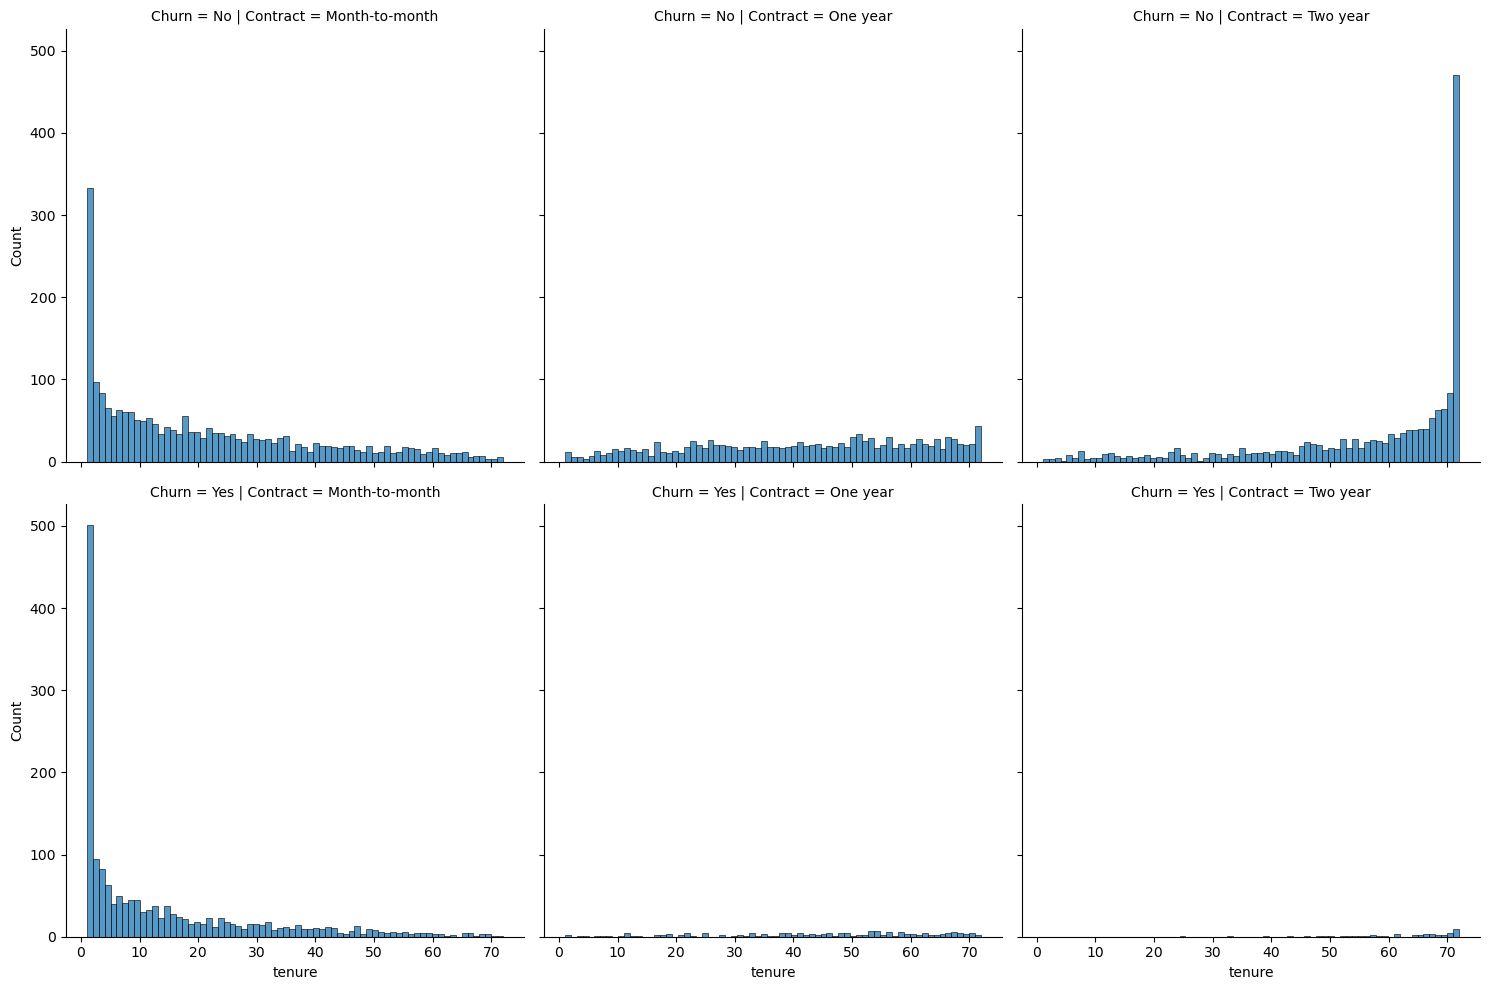

In [43]:
# A distribution seperated by two additional features i.e 'Churn' and 'Contract'.

sns.displot(data = df, x = 'tenure', bins = 70, col = 'Contract', row = 'Churn')

<Axes: title={'center': 'The Relationship Between TotalCharges & MonthlyCharges'}, xlabel='MonthlyCharges', ylabel='TotalCharges'>

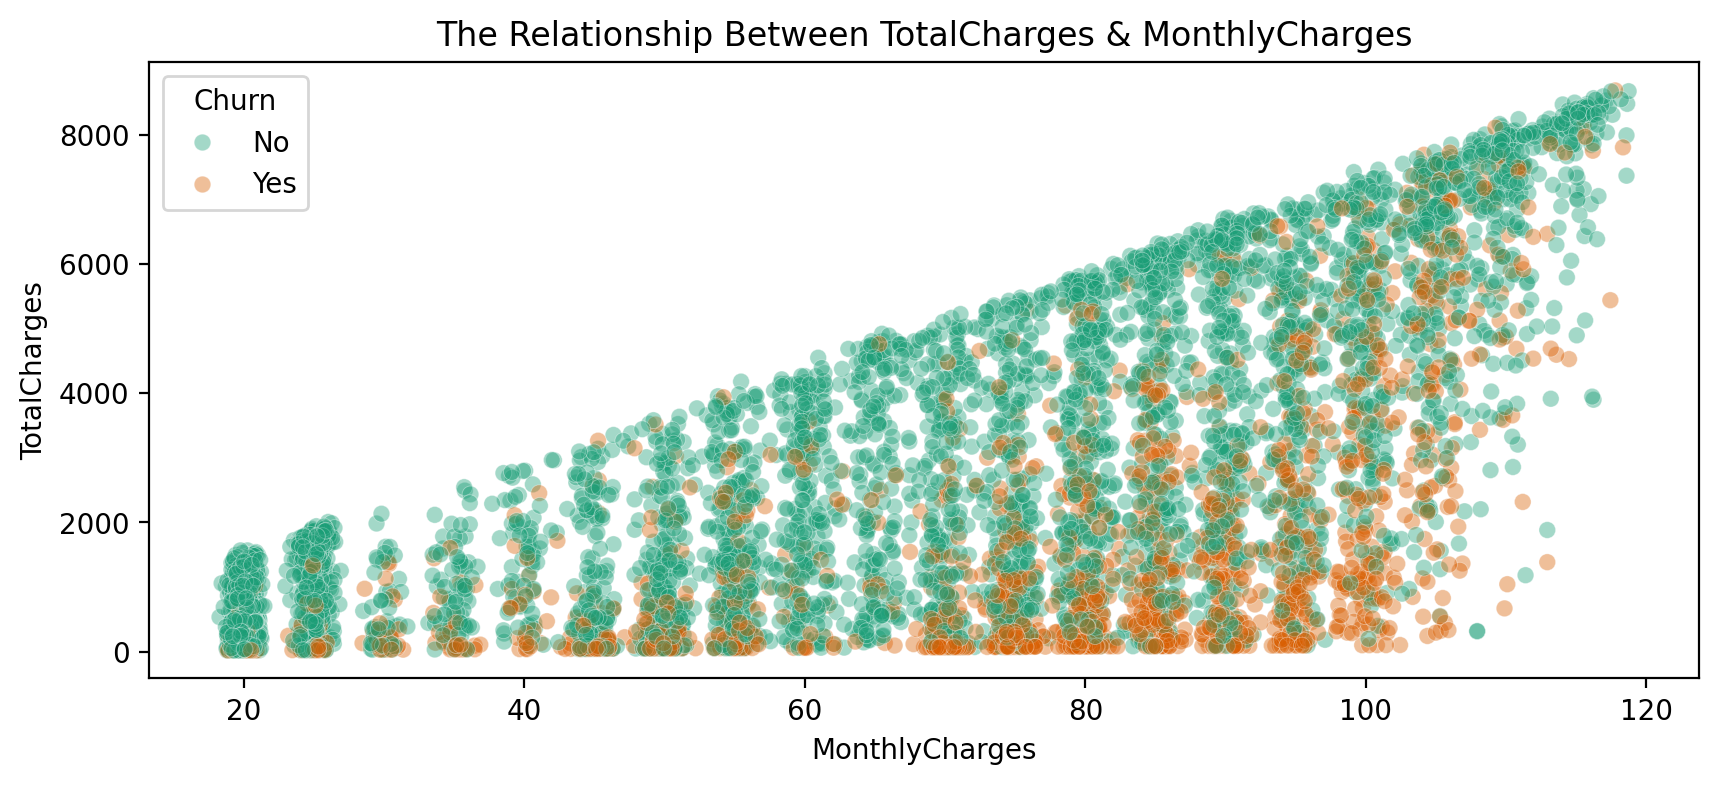

In [44]:
# Using a Scatterplot to display relationship between TotalCharges and MonthlyCharges

plt.figure(figsize=(10, 4), dpi= 200)
plt.title('The Relationship Between TotalCharges & MonthlyCharges')
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue= 'Churn', alpha = 0.4, linewidth=0.3, palette='Dark2')

- **Cohort Based on Tenure**: Treating each unique tenure group as a cohort by calculating the Churn rate (i.e percentage that had Yes Churn) per Cohort.

In [47]:
yes_churn = df.groupby(['Churn', 'tenure']).count().transpose()['Yes']

In [48]:
yes_churn

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
gender,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
SeniorCitizen,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Partner,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Dependents,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
PhoneService,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
MultipleLines,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
InternetService,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
OnlineSecurity,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
OnlineBackup,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6


In [49]:
no_churn = df.groupby(['Churn', 'tenure']).count().transpose()['No']

In [50]:
no_churn

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
gender,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
SeniorCitizen,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Partner,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Dependents,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
PhoneService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
MultipleLines,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
InternetService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineSecurity,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineBackup,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356


In [51]:
# Calculating the rate 

churn_rate = 100 * yes_churn /(no_churn + yes_churn)

In [55]:
churn_rate.transpose()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
tenure,,,,,,,,,,,,,,,,,,,
1,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212
2,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672
3,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
4,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091
5,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
69,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053
70,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697


In [56]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

- **Border Cohort Groups**: Based on the tenure column values, creating a new column called Tenure Cohort that creates four (4) seperate categories.

  '0 - 12 Months'
  '12 - 24 Months'
  '24 - 48 Months'
  'Over 48 Months'

In [57]:
def cohort(tenure):
    if tenure < 13:
        return '0 - 12 Months'
    elif tenure < 25:
        return '12 - 24 Months'
    elif tenure < 49:
        return '24 - 48 Months' 
    else:
        return 'Over 48 Months'

In [59]:
df['tenure'].apply(cohort)

0        0 - 12 Months
1       24 - 48 Months
2        0 - 12 Months
3       24 - 48 Months
4        0 - 12 Months
             ...      
7027    12 - 24 Months
7028    Over 48 Months
7029     0 - 12 Months
7030     0 - 12 Months
7031    Over 48 Months
Name: tenure, Length: 7032, dtype: object

In [61]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [64]:
df[['Tenure Cohort', 'tenure']]

,Tenure Cohort,tenure
0,0 - 12 Months,1
1,24 - 48 Months,34
2,0 - 12 Months,2
3,24 - 48 Months,45
4,0 - 12 Months,2
...,...,...
7027,12 - 24 Months,24
7028,Over 48 Months,72
7029,0 - 12 Months,11
7030,0 - 12 Months,4


<Axes: title={'center': 'The Relationship Between TotalCharges & MonthlyCharges with hue = Tenure Cohort'}, xlabel='MonthlyCharges', ylabel='TotalCharges'>

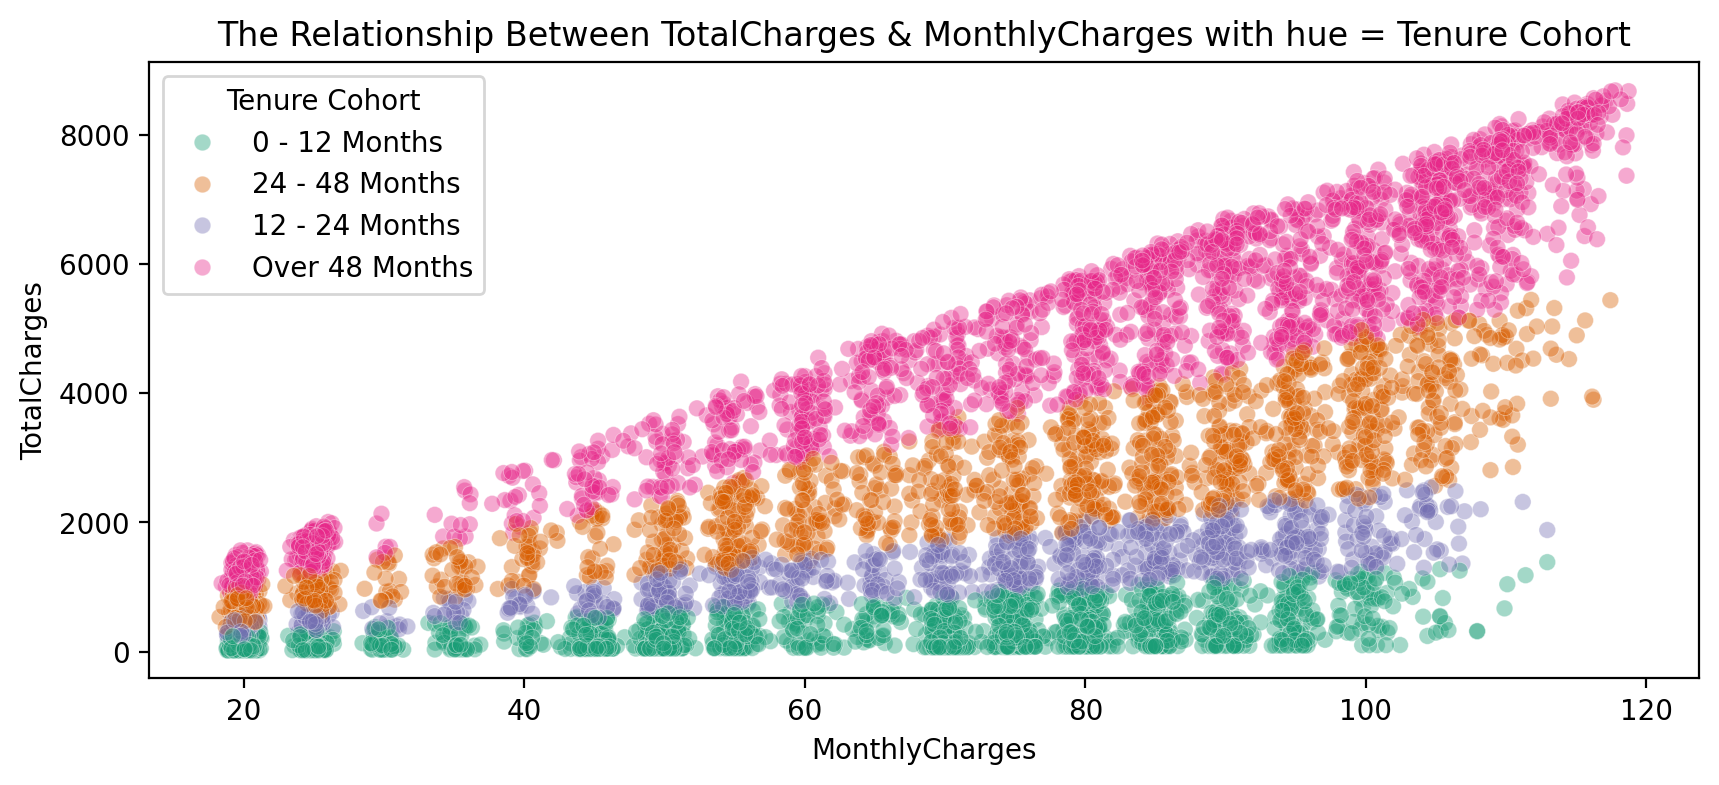

In [66]:
# Visualization of the based tenure chohort

plt.figure(figsize=(10, 4), dpi= 200)
plt.title('The Relationship Between TotalCharges & MonthlyCharges with hue = Tenure Cohort')
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue= 'Tenure Cohort', alpha = 0.4, linewidth=0.3, palette='Dark2')

<Axes: xlabel='Tenure Cohort', ylabel='count'>

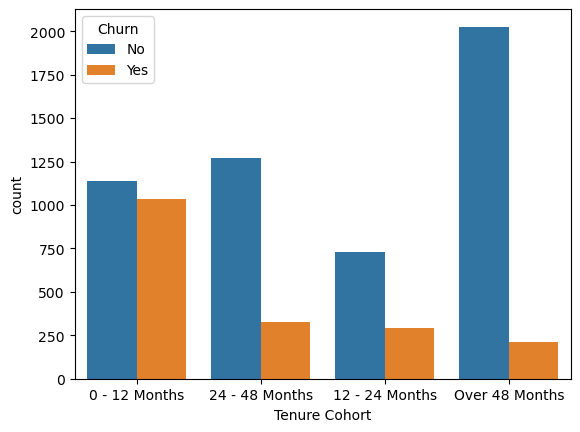

In [67]:
# A distribution showing the churn count per cohort

sns.countplot(data = df, x='Tenure Cohort', hue='Churn')

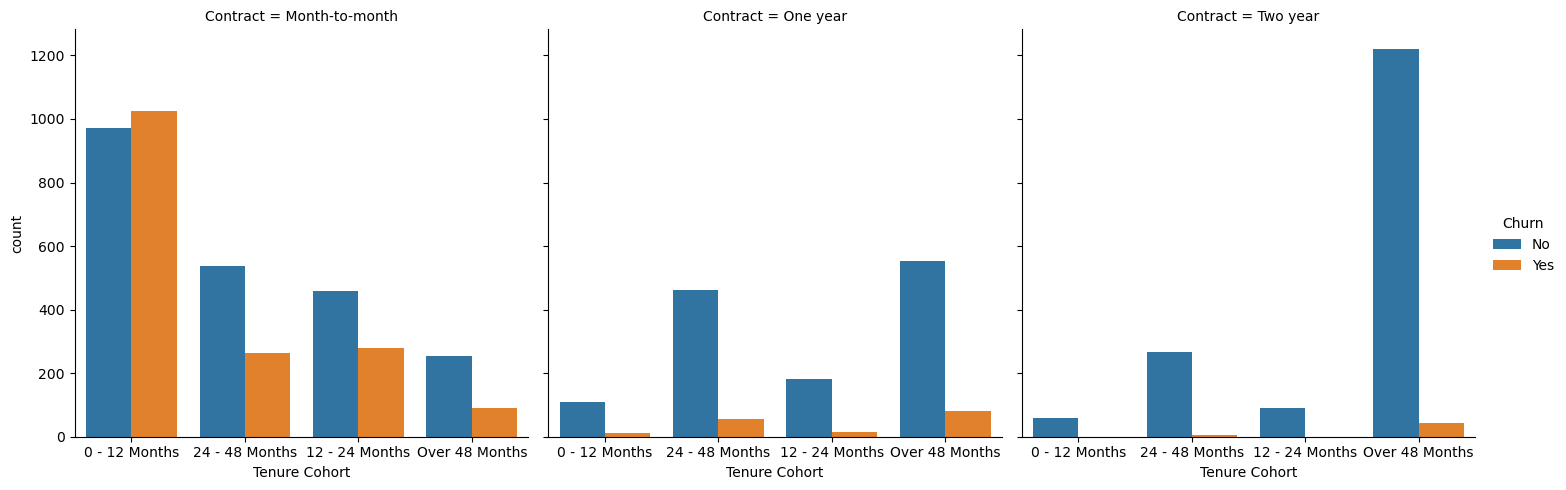

In [68]:
# A distibution showing counts per tenure cohort  seperated by  contract typr and colored by the churn hue

sns.catplot(data=df, x='Tenure Cohort', hue='Churn', kind='count', col ='Contract')

**PREDICTIVE MODELLING:**

- Exploring four different tree based method i.e A Single Decision Tree, Random Forest, AdaBoost & Gradient Boosting

1. Single Decision Tree

In [70]:
# Seperate the data into features and label. Also creating a dummy variables where necessary and taking note of any features that won't be needed.

X = df.drop(['Churn', 'customerID'], axis = 1)

In [71]:
X = pd.get_dummies(X, drop_first = True)

In [72]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure Cohort_12 - 24 Months,Tenure Cohort_24 - 48 Months,Tenure Cohort_Over 48 Months
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0


In [73]:
y = df['Churn']

In [74]:
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [75]:
# Splitting the dataset into training and testing dataset holding out 10% of the data for testing and using a random state of 101.

from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

1. Decision Tree Model and its Performance

In [77]:
# Creting the model

from sklearn.tree import DecisionTreeClassifier

In [78]:
dt = DecisionTreeClassifier()

In [79]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [80]:
# Performance metrics of the model

from sklearn.metrics import classification_report, plot_confusion_matrix

In [82]:
preds = dt.predict(X_test)

In [84]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.85      0.80      0.83       557
         Yes       0.39      0.48      0.43       147

    accuracy                           0.73       704
   macro avg       0.62      0.64      0.63       704
weighted avg       0.76      0.73      0.74       704



C:\Users\BenJ\Desktop\Ananconda\envs\My-Environment\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


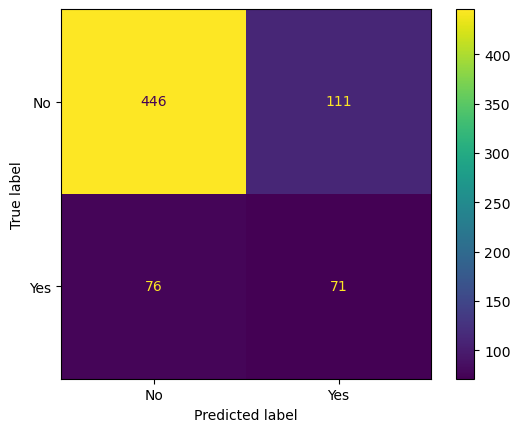

In [85]:
plot_confusion_matrix(dt, X_test, y_test)

In [86]:
# Building on the above model by customizing the max_depth size to 6

dts = DecisionTreeClassifier(max_depth = 6)

In [87]:
dts.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [88]:
dts_preds = dts.predict(X_test)

In [89]:
print(classification_report(y_test, dts_preds))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



C:\Users\BenJ\Desktop\Ananconda\envs\My-Environment\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


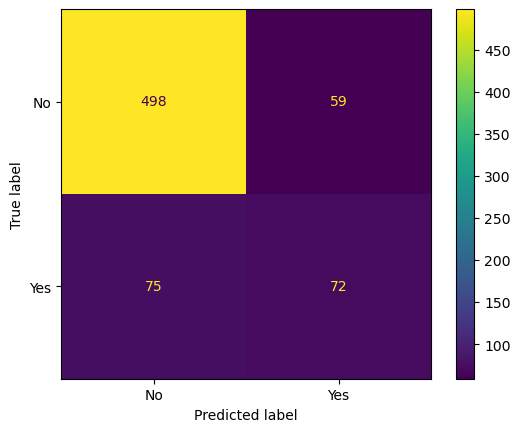

In [90]:
plot_confusion_matrix(dts, X_test, y_test)

In [92]:
imp_feats = pd.DataFrame(data=dts.feature_importances_, index = X.columns, columns = ['Feat Imp'])

In [93]:
imp_feats = imp_feats.sort_values('Feat Imp')

In [94]:
imp_feats = imp_feats[imp_feats['Feat Imp']>0]

In [95]:
imp_feats

,Feat Imp
gender_Male,0.001237
OnlineBackup_Yes,0.005341
PhoneService_Yes,0.007852
TechSupport_Yes,0.007868
OnlineSecurity_Yes,0.008376
Contract_One year,0.010021
MultipleLines_Yes,0.012432
SeniorCitizen,0.012680
OnlineBackup_No internet service,0.026290
Contract_Two year,0.027065


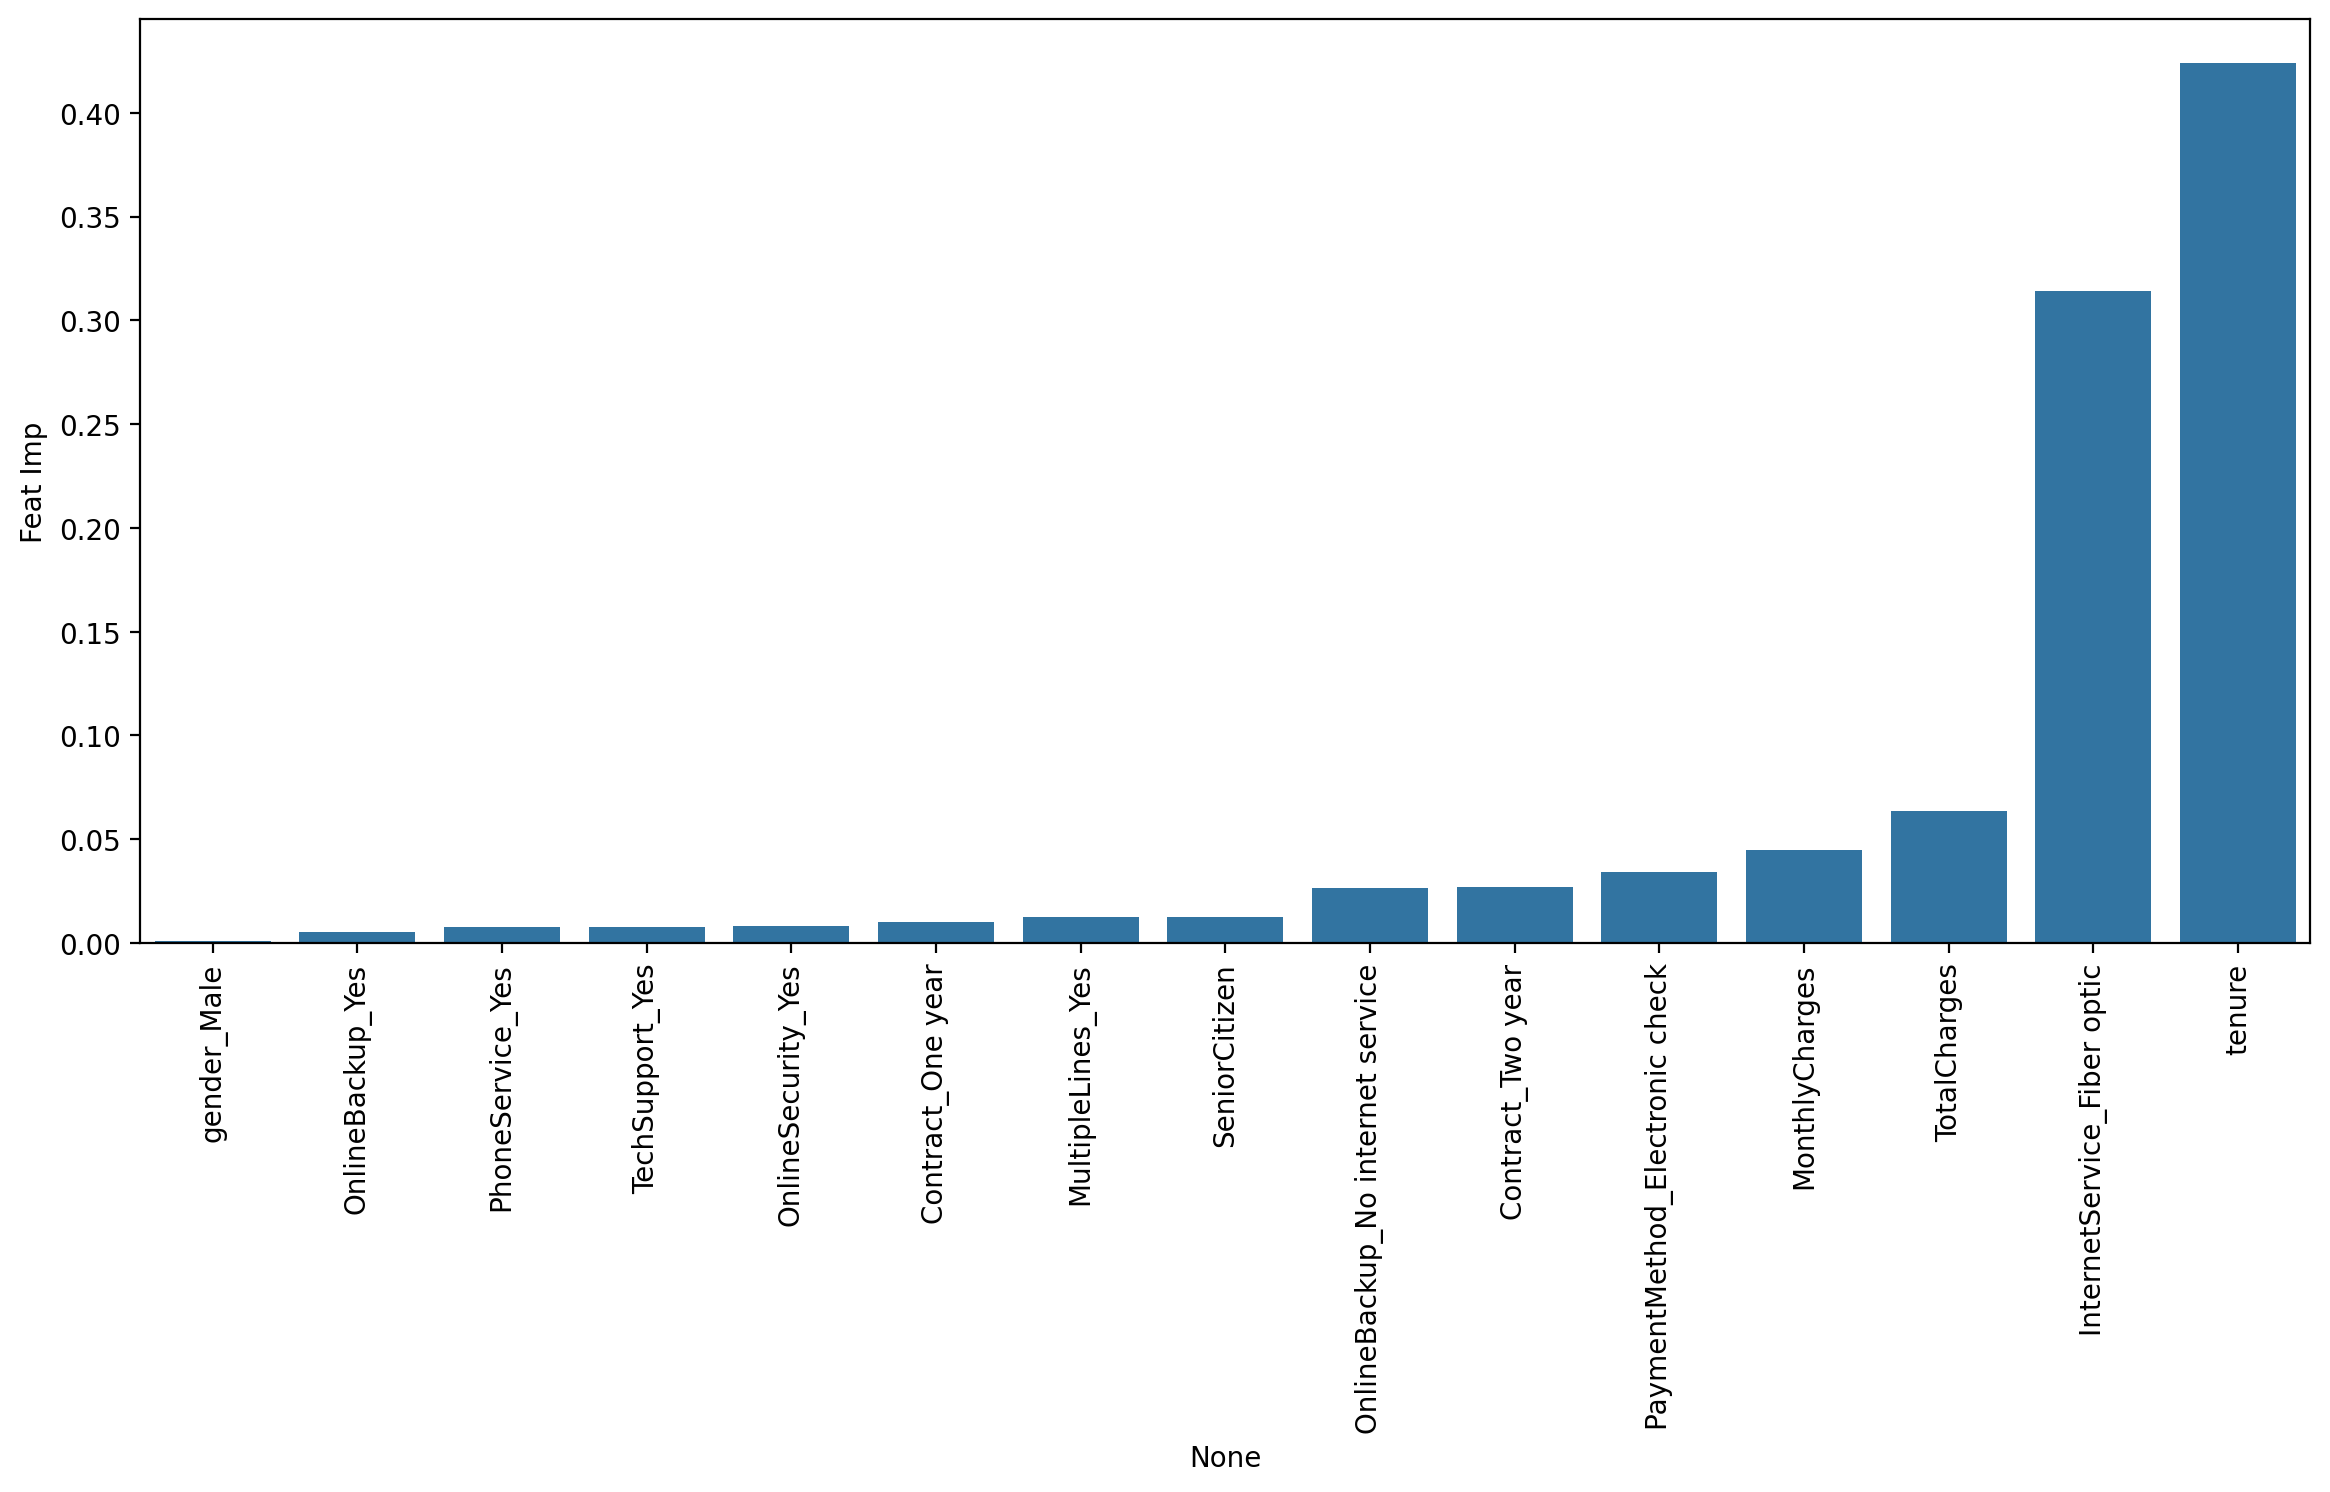

In [97]:
plt.figure(figsize = (14, 6), dpi = 200)
sns.barplot(data = imp_feats, x = imp_feats.index, y = 'Feat Imp')
plt.xticks(rotation = 90);

2. Random Forest Model and its Performance:
   
- Creating a Random Forest model and checking its performance based on classification report and plot confusion matrix

In [103]:
# Creating the model using the custom parameters

from sklearn.ensemble import RandomForestClassifier

In [104]:
rf = RandomForestClassifier()

In [105]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [106]:
# Evaluating the performance of the model

rf_preds = rf.predict(X_test)

In [107]:
print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

          No       0.86      0.88      0.87       557
         Yes       0.50      0.44      0.47       147

    accuracy                           0.79       704
   macro avg       0.68      0.66      0.67       704
weighted avg       0.78      0.79      0.79       704



In [108]:
# Adjusting the max_depth parameter to 6

rfs = RandomForestClassifier(max_depth = 6)

In [109]:
rfs.fit(X_train, y_train)

RandomForestClassifier(max_depth=6)

In [110]:
rfs_preds = rfs.predict(X_test)

In [112]:
# Evaluating the model

print(classification_report(y_test, rfs_preds))

              precision    recall  f1-score   support

          No       0.87      0.92      0.89       557
         Yes       0.61      0.46      0.52       147

    accuracy                           0.83       704
   macro avg       0.74      0.69      0.71       704
weighted avg       0.81      0.83      0.82       704



C:\Users\BenJ\Desktop\Ananconda\envs\My-Environment\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


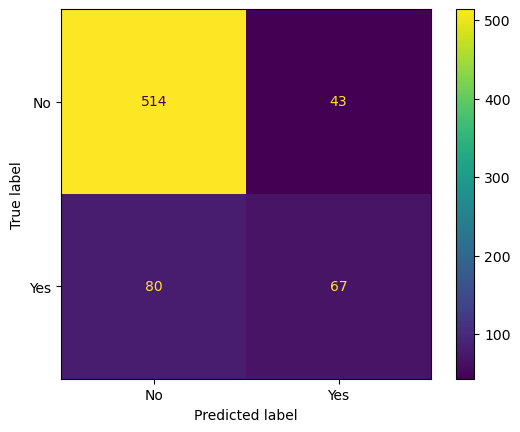

In [114]:
plot_confusion_matrix(rfs, X_test, y_test)

3. Gradient Boosting Model & its performance

In [121]:
# Creating the model

from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

In [116]:
gb_model = GradientBoostingClassifier()

In [117]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [118]:
# Evaluating the performance metric

gb_preds = gb_model.predict(X_test)

In [119]:
print(classification_report(y_test, gb_preds))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



C:\Users\BenJ\Desktop\Ananconda\envs\My-Environment\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


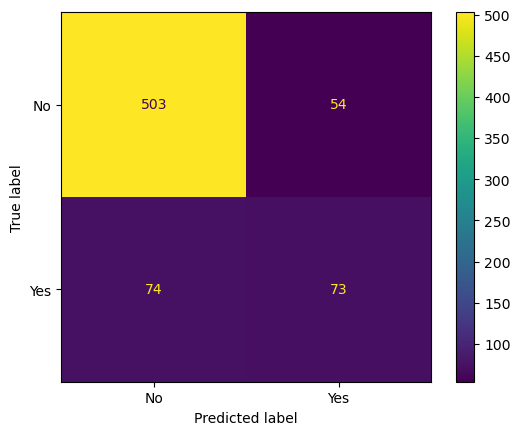

In [120]:
plot_confusion_matrix(gb_model, X_test, y_test)

4. AdaBoost Model and Performance

In [122]:
ab_model = AdaBoostClassifier()

In [123]:
ab_model.fit(X_train, y_train)

AdaBoostClassifier()

In [124]:
# Evaluating the model performance

ab_preds = ab_model.predict(X_test)

In [125]:
print(classification_report(y_test, ab_preds))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



C:\Users\BenJ\Desktop\Ananconda\envs\My-Environment\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


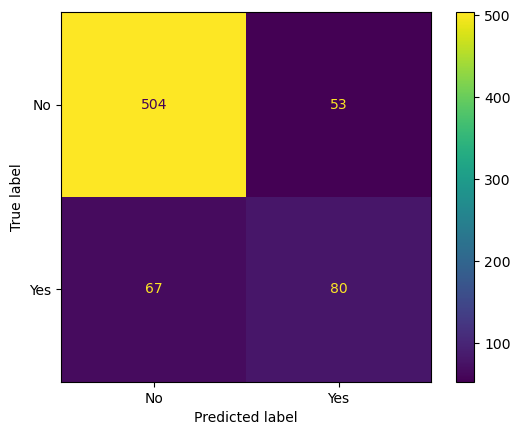

In [126]:
plot_confusion_matrix(ab_model, X_test, y_test)

In [128]:
# Adjusting the custom paramater of the n_estimators from 50 to 100

ab_models = AdaBoostClassifier(n_estimators = 100)

In [129]:
ab_models.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [130]:
# Evaluating the model

ab_prediction = ab_models.predict(X_test)

In [131]:
print(classification_report(y_test, ab_prediction))

              precision    recall  f1-score   support

          No       0.88      0.92      0.90       557
         Yes       0.63      0.53      0.58       147

    accuracy                           0.84       704
   macro avg       0.76      0.72      0.74       704
weighted avg       0.83      0.84      0.83       704



In [ ]:
Thus, A